In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In this project, we'll practice the machine learning workflow to predict a car's market price using its attributes. 

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data.txt', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Select only the columns with continuous values  
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


# Data cleaning

In [4]:
numeric_cars=numeric_cars.replace("?",np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


Because '?' is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). After replacing the ? values, let's convert all columns to the float type.

In [5]:
# convert string columns to float
numeric_cars=numeric_cars.astype(float)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [6]:
numeric_cars['normalized-losses'].isnull().sum()

41

In [7]:
numeric_cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Because `price` is the column we want to predict, let's remove any rows with missing `price` values.

In [8]:
numeric_cars.dropna(subset=["price"],inplace=True)
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [10]:
# Confirm that there's no more missing values!
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Normalize all columnns to range from 0 to 1 except the target column.

In [11]:
price_col=numeric_cars["price"]
numeric_cars=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars["price"]=price_col
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# univariate k-nearest neighbors model

### creating K-nearest neighbors training function:

In [31]:
numeric_cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.298429,0.355598,0.494045,0.477697,0.497222,0.414145,0.564793,0.565192,0.197767,0.258864,0.394934,0.338308,0.386489,13207.129353
std,0.167520,0.176862,0.183913,0.179613,0.203985,0.200658,0.191480,0.150499,0.250310,0.174606,0.195148,0.178423,0.179346,7947.066342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.188482,0.230321,0.383582,0.324786,0.350000,0.264158,0.435714,0.495238,0.100000,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.550000,0.580952,0.125000,0.219626,0.394934,0.305556,0.368421,10295.000000
75%,0.376963,0.460641,0.632836,0.538462,0.641667,0.557797,0.742857,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


In [38]:
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_features,target_feature,df):
    # randomize the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    #splitting the data into a training set and a testing set.
    last_training_row=int(len(df)*0.8) # getting 80% of the data for training
    train_df=df.iloc[:last_training_row]
    test_df=df.iloc[last_training_row:]
    knn=KNeighborsRegressor()
    knn.fit(train_df[[training_features]],train_df[target_feature])
    predictions=knn.predict(test_df[[training_features]])
    mse=mean_squared_error(test_df[target_feature],predictions)
    rmse=np.sqrt(mse)
    return rmse

### Determining which column predict the price better:

In [39]:
cols=numeric_cars.columns
cols=cols.drop("price")
target_feauture="price"
rmse_dict=dict()
for col in cols:
    rmse=knn_train_test(col,target_feauture,numeric_cars)
    rmse_dict[col]=rmse
rmse_series=pd.Series(rmse_dict)
rmse_series.sort_values()

curb-weight          3542.232504
city-mpg             4004.261065
width                4289.527858
highway-mpg          4425.000532
wheel-base           4692.348776
horsepower           5037.249086
length               5776.389428
compression-rate     5823.942730
peak-rpm             7039.661065
height               7114.466472
normalized-losses    7312.839939
stroke               8509.786245
bore                 8570.096664
dtype: float64

=> The curb-weight column give us the lowest root squared mean error.

### Hyperparameter Optimization:

In this section, we will variate k(the number of neighbors) and determine the best k param for each column.

In [40]:
def knn_train_test(training_features,target_feature,df,k):
    # randomize the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    #splitting the data into a training set and a testing set.
    last_training_row=int(len(df)*0.8) # getting 80% of the data for training
    train_df=df.iloc[:last_training_row]
    test_df=df.iloc[last_training_row:]
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[training_features]],train_df[target_feature])
    predictions=knn.predict(test_df[[training_features]])
    mse=mean_squared_error(test_df[target_feature],predictions)
    rmse=np.sqrt(mse)
    return rmse

In [42]:
cols=numeric_cars.columns.drop("price")
target_feauture="price"
rmse_dict=dict()
k_list= [1, 3, 5, 7, 9]
for col in cols:
    k_rmse_dic=dict()
    for k in k_list:
        rmse=knn_train_test(col,target_feauture,numeric_cars,k)
        k_rmse_dic[k]=rmse
    rmse_dict[col]=k_rmse_dic
rmse_dict

{'normalized-losses': {1: 6752.715222638133,
  3: 7593.650809583371,
  5: 7312.839938881974,
  7: 7178.556599183808,
  9: 7447.550735580691},
 'wheel-base': {1: 2952.700719101983,
  3: 3663.3229010703894,
  5: 4692.348776153917,
  7: 4842.606524612033,
  9: 4967.944752918635},
 'length': {1: 5859.903974073794,
  3: 5888.568349894745,
  5: 5776.389428041555,
  7: 5194.750417819372,
  9: 4619.328098435929},
 'width': {1: 3016.8642054534607,
  3: 4497.613775937945,
  5: 4289.527857923577,
  7: 4191.397564186104,
  9: 4013.061555643361},
 'height': {1: 6148.6606790699925,
  3: 7574.277044037761,
  5: 7114.46647188053,
  7: 7059.4162099980385,
  9: 7112.208123377993},
 'curb-weight': {1: 4185.38209637817,
  3: 3865.4854755980678,
  5: 3542.232503971912,
  7: 3648.8946863476,
  9: 3902.9189076894745},
 'bore': {1: 11325.623045371662,
  3: 11020.816129115008,
  5: 8570.096663996499,
  7: 8365.797896227094,
  9: 8775.94193557989},
 'stroke': {1: 9909.988887788802,
  3: 6976.582326565751,
  5: 

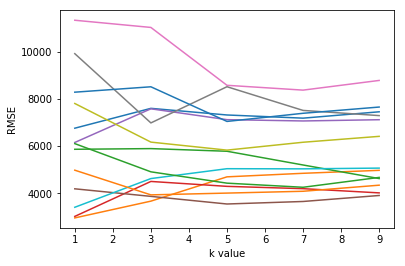

In [45]:
for k,v in rmse_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# multivariate k-nearest neighbors model

### train the model using multiple features with the default k value(k=5):

In [47]:
def knn_train_test(training_features,target_feature,df):
    # randomize the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    #splitting the data into a training set and a testing set.
    last_training_row=int(len(df)*0.8) # getting 80% of the data for training
    train_df=df.iloc[:last_training_row]
    test_df=df.iloc[last_training_row:]
    knn=KNeighborsRegressor()
    knn.fit(train_df[training_features],train_df[target_feature])
    predictions=knn.predict(test_df[training_features])
    mse=mean_squared_error(test_df[target_feature],predictions)
    rmse=np.sqrt(mse)
    return rmse

In [48]:
all_features=numeric_cars.columns.drop("price")
target_feauture="price"
rmse_dict=dict()
rmse=knn_train_test(all_features,target_feauture,numeric_cars)
rmse_dict["all_features"]=rmse

two_best_features = ['horsepower', 'width']
rmse=knn_train_test(two_best_features,target_feauture,numeric_cars)
rmse_dict["two_best_features"]=rmse

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse=knn_train_test(three_best_features,target_feauture,numeric_cars)
rmse_dict["three_best_features"]=rmse

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse=knn_train_test(three_best_features,target_feauture,numeric_cars)
rmse_dict["three_best_features"]=rmse

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse=knn_train_test(five_best_features,target_feauture,numeric_cars)
rmse_dict["five_best_features"]=rmse

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse=knn_train_test(three_best_features,target_feauture,numeric_cars)
rmse_dict["six_best_features"]=rmse
rmse_series=pd.Series(rmse_dict)
rmse_series.sort_values()

three_best_features    2360.651095
six_best_features      2360.651095
five_best_features     2634.202135
all_features           2876.577934
two_best_features      3074.249933
dtype: float64

### Hyperparameter Optimization:

Let's now optimize the model that performed the best in the previous step.

For the top 3 models in the last step, we will vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.

In [51]:
def knn_train_test(training_features,target_feature,df,k):
    # randomize the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    #splitting the data into a training set and a testing set.
    last_training_row=int(len(df)*0.8) # getting 80% of the data for training
    train_df=df.iloc[:last_training_row]
    test_df=df.iloc[last_training_row:]
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[training_features],train_df[target_feature])
    predictions=knn.predict(test_df[training_features])
    mse=mean_squared_error(test_df[target_feature],predictions)
    rmse=np.sqrt(mse)
    return rmse

In [52]:
features_dict=dict()
features_dict["three_best_features"]=['horsepower', 'width', 'curb-weight']
features_dict["six_best_features"]=['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
features_dict["five_best_features"]=['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
target_feauture="price"
rmse_dict=dict()
k_list= list(range(1,26))
for key in features_dict:
    k_rmse_dic=dict()
    for k in k_list:
        rmse=knn_train_test(features_dict[key],target_feauture,numeric_cars,k)
        k_rmse_dic[k]=rmse
    rmse_dict[key]=k_rmse_dic
rmse_dict

{'three_best_features': {1: 1967.212222112619,
  2: 2269.8690611746856,
  3: 2073.232860347562,
  4: 2340.63747440422,
  5: 2360.651095179195,
  6: 2449.2839216794146,
  7: 2519.4461551738527,
  8: 2675.6028014957587,
  9: 2743.3287023552084,
  10: 2655.9484056845945,
  11: 2671.3351347852704,
  12: 2803.1674934391117,
  13: 2972.088174701227,
  14: 3145.986579593843,
  15: 3263.2379061095003,
  16: 3373.1199782785734,
  17: 3399.3915649444302,
  18: 3536.6902166748046,
  19: 3636.4834645445894,
  20: 3730.2502067147084,
  21: 3803.1690854579915,
  22: 3843.263822916376,
  23: 3934.6611615163774,
  24: 4023.55284048768,
  25: 4059.4954960510227},
 'six_best_features': {1: 2246.15437212464,
  2: 2252.488114800403,
  3: 2475.7126033344307,
  4: 2408.9837071936354,
  5: 2387.2885832073584,
  6: 2522.701178588115,
  7: 2418.1011107029576,
  8: 2471.2046058323854,
  9: 2595.8324426202075,
  10: 2655.1685582890645,
  11: 2701.580667573444,
  12: 2851.431852167293,
  13: 2941.890328146704,
  

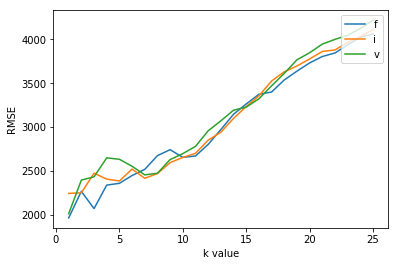

In [59]:
for k,v in rmse_dict.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(k,loc="upper right")

In [74]:
rmse_df=pd.DataFrame(rmse_dict)
rmse_df

,three_best_features,six_best_features,five_best_features
1,1967.212222,2246.154372,2014.581358
2,2269.869061,2252.488115,2397.337535
3,2073.232860,2475.712603,2434.853889
4,2340.637474,2408.983707,2650.450543
5,2360.651095,2387.288583,2634.202135
6,2449.283922,2522.701179,2554.607495
7,2519.446155,2418.101111,2456.812821
8,2675.602801,2471.204606,2475.291633
9,2743.328702,2595.832443,2631.034193
10,2655.948406,2655.168558,2698.611588


In [75]:
min_rmse=rmse_df.min()
min_rmse

three_best_features    1967.212222
six_best_features      2246.154372
five_best_features     2014.581358
dtype: float64

In [78]:
rmse_df.describe()

,three_best_features,six_best_features,five_best_features
count,25.000000,25.000000,25.000000
mean,3050.044233,3083.295817,3140.648178
std,652.766899,641.388347,654.131034
min,1967.212222,2246.154372,2014.581358
25%,2519.446155,2475.712603,2631.034193
50%,2972.088175,2941.890328,3071.677359
75%,3636.483465,3695.133463,3765.454580
max,4059.495496,4109.078999,4215.688870


# Using Kfold cross validation for the test:

In [79]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, numeric_cars[three_best_features], numeric_cars["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  3047.596573356978 std RMSE:  428.412696706833
5 folds:  avg RMSE:  3027.7487021204315 std RMSE:  749.7552497059953
7 folds:  avg RMSE:  3044.5321764510186 std RMSE:  668.2801711870969
9 folds:  avg RMSE:  2845.4158639236744 std RMSE:  1092.4110513163641
10 folds:  avg RMSE:  2955.896652317141 std RMSE:  875.0087184770188
11 folds:  avg RMSE:  2832.855247658586 std RMSE:  1257.3045268996636
13 folds:  avg RMSE:  2935.465061211338 std RMSE:  1018.4764076279324
15 folds:  avg RMSE:  2889.4245586032057 std RMSE:  1104.4659217807948
17 folds:  avg RMSE:  2784.960718160707 std RMSE:  1189.551037911178
19 folds:  avg RMSE:  2769.6241979406277 std RMSE:  1396.3975915079818
21 folds:  avg RMSE:  2734.511914150665 std RMSE:  1404.5229764170492
23 folds:  avg RMSE:  2741.5960453692414 std RMSE:  1357.0572769877474
